In [1]:
import csv

STOCKS_FILE_NAME = 'N7.csv'

def get_stocks():
    with open(STOCKS_FILE_NAME, 'r') as f:
        reader = csv.reader(f, delimiter=',', quotechar='"')
        stocks = [stock.strip() for row in reader for stock in row]
    return stocks

stocks = get_stocks()
stocks[:5]

['PIH', 'FLWS', 'FCCY', 'SRCE', 'VNET']

In [2]:
import requests
import csv

def get_minute_data(symbol):        
    url = "https://www.google.com/finance/getprices?i=60&p=10d&f=d,o,h,l,c,v&df=cpct&q={}".format(symbol)
    page = requests.get(url)
    reader = csv.reader(page.content.decode('utf-8').splitlines())
    return symbol, list(reader) 
_, data = get_minute_data("AAPL")
data

[['EXCHANGE%3DNASDAQ'],
 ['MARKET_OPEN_MINUTE=570'],
 ['MARKET_CLOSE_MINUTE=960'],
 ['INTERVAL=60'],
 ['COLUMNS=DATE', 'CLOSE', 'HIGH', 'LOW', 'OPEN', 'VOLUME'],
 ['DATA='],
 ['TIMEZONE_OFFSET=-240'],
 ['a1526304600', '189.1', '189.1', '188.974', '189.01', '300367'],
 ['1', '189.39', '189.43', '189', '189.1', '157118'],
 ['2', '189.4', '189.44', '189.32', '189.415', '103324'],
 ['3', '189.5', '189.53', '189.37', '189.42', '182304'],
 ['4', '189.22', '189.52', '189.2', '189.505', '96612'],
 ['5', '188.91', '189.3', '188.9', '189.2501', '120340'],
 ['6', '188.8', '188.94', '188.59', '188.9', '117249'],
 ['7', '188.6102', '188.84', '188.47', '188.83', '170136'],
 ['8', '188.8', '188.8', '188.58', '188.618', '67425'],
 ['9', '188.8468', '188.88', '188.69', '188.77', '83870'],
 ['10', '188.77', '188.94', '188.72', '188.84', '80966'],
 ['11', '188.902', '188.92', '188.76', '188.79', '65361'],
 ['12', '188.914', '188.94', '188.84', '188.9', '69546'],
 ['13', '188.96', '189', '188.88', '188.9'

In [3]:
from datetime import datetime, timedelta
import pytz
import pandas as pd
import numpy as np

DATA_TIMEZONE = pytz.timezone("US/Eastern")
LOCAL_TZ = pytz.timezone('America/Los_Angeles')

def minute_data_to_df(data):
    base_timestamp = 0
    t, c, h, l, o, v = [[] for i in range(6)]
    for i, row in enumerate(data):
        if len(row) == 6:
            timestamp, close, high, low, open, volume = row
            if timestamp.startswith("a"):
                base_timestamp = int(timestamp[1:])                
            elif timestamp.isnumeric(): 
                delta = timedelta(seconds=60 * (int(timestamp) - 1))
                dt = datetime.fromtimestamp(base_timestamp, tz=DATA_TIMEZONE) + delta
                t.append(dt.astimezone(LOCAL_TZ))
                c.append(float(close))
                h.append(float(high))
                l.append(float(low))
                o.append(float(open))
                v.append(int(volume))
                
    df = df = pd.DataFrame(dict(time=t, close=c, high=h, low=l, open=o, volume=v))
    return df                
    
md_df = minute_data_to_df(data)
md_df

,close,high,low,open,time,volume
0,189.3900,189.4300,189.000,189.1000,2018-05-14 06:30:00-07:00,157118
1,189.4000,189.4400,189.320,189.4150,2018-05-14 06:31:00-07:00,103324
2,189.5000,189.5300,189.370,189.4200,2018-05-14 06:32:00-07:00,182304
3,189.2200,189.5200,189.200,189.5050,2018-05-14 06:33:00-07:00,96612
4,188.9100,189.3000,188.900,189.2501,2018-05-14 06:34:00-07:00,120340
5,188.8000,188.9400,188.590,188.9000,2018-05-14 06:35:00-07:00,117249
6,188.6102,188.8400,188.470,188.8300,2018-05-14 06:36:00-07:00,170136
7,188.8000,188.8000,188.580,188.6180,2018-05-14 06:37:00-07:00,67425
8,188.8468,188.8800,188.690,188.7700,2018-05-14 06:38:00-07:00,83870
9,188.7700,188.9400,188.720,188.8400,2018-05-14 06:39:00-07:00,80966


In [4]:
last_date = md_df.time.max().date()
print(last_date)
prev_days_data = md_df[md_df.time.dt.date != last_date]
prev_data_len = len(prev_days_data)
prev_close = prev_days_data.iloc[prev_data_len - 1].close
print(prev_close)

2018-05-25
188.15


In [5]:
avg9days = md_df[md_df.time.dt.date != last_date].volume.mean()
print(avg9days)
md_df = md_df[md_df.time.dt.date == last_date].copy()
md_df['prev_close'] = prev_close
md_df['current_score'] = md_df.volume / avg9days
dd_len = len(md_df)
md_df['rolling_score'] = md_df.current_score.rolling(window=dd_len, min_periods=1).mean()
md_df

39335.54301994302


,close,high,low,open,time,volume,prev_close,current_score,rolling_score
3510,188.5600,188.5800,188.2300,188.2750,2018-05-25 06:30:00-07:00,118513,188.15,3.012873,3.012873
3511,188.6301,188.7400,188.5300,188.5600,2018-05-25 06:31:00-07:00,119111,188.15,3.028076,3.020474
3512,188.4234,188.6900,188.3500,188.6400,2018-05-25 06:32:00-07:00,62431,188.15,1.587140,2.542696
3513,188.2200,188.4900,188.2200,188.4400,2018-05-25 06:33:00-07:00,50449,188.15,1.282530,2.227655
3514,187.6900,188.2700,187.6500,188.2200,2018-05-25 06:34:00-07:00,140617,188.15,3.574808,2.497085
3515,187.9200,188.0199,187.7000,187.7000,2018-05-25 06:35:00-07:00,74613,188.15,1.896834,2.397043
3516,188.0300,188.1000,187.9000,187.9200,2018-05-25 06:36:00-07:00,69723,188.15,1.772519,2.307826
3517,188.0950,188.1168,187.9700,188.0200,2018-05-25 06:37:00-07:00,59310,188.15,1.507797,2.207822
3518,188.0600,188.0900,187.9400,188.0700,2018-05-25 06:38:00-07:00,51752,188.15,1.315655,2.108692
3519,188.0300,188.2000,188.0100,188.0500,2018-05-25 06:39:00-07:00,94289,188.15,2.397043,2.137527


In [6]:
todays_open = md_df.iloc[0].open
dd_len = len(md_df)
md_df['opening_change'] = (todays_open / md_df['prev_close'] - 1) * 100
md_df['rolling_high'] = md_df.high.rolling(window=dd_len, min_periods=1).max()
md_df['rolling_low'] = md_df.low.rolling(window=dd_len, min_periods=1).min()
md_df['change_current'] = (md_df.close / todays_open - 1) * 100
md_df['change_high'] = (md_df.rolling_high / todays_open - 1) * 100
md_df['change_low'] = (md_df.rolling_low / todays_open - 1) * 100
md_df[["close", "high", "low", "open", "change_current", "change_high", "change_low", "opening_change"]]

,close,high,low,open,change_current,change_high,change_low,opening_change
3510,188.5600,188.5800,188.2300,188.2750,0.151374,0.161997,-0.023901,0.066436
3511,188.6301,188.7400,188.5300,188.5600,0.188607,0.246979,-0.023901,0.066436
3512,188.4234,188.6900,188.3500,188.6400,0.078821,0.246979,-0.023901,0.066436
3513,188.2200,188.4900,188.2200,188.4400,-0.029213,0.246979,-0.029213,0.066436
3514,187.6900,188.2700,187.6500,188.2200,-0.310716,0.246979,-0.331961,0.066436
3515,187.9200,188.0199,187.7000,187.7000,-0.188554,0.246979,-0.331961,0.066436
3516,188.0300,188.1000,187.9000,187.9200,-0.130129,0.246979,-0.331961,0.066436
3517,188.0950,188.1168,187.9700,188.0200,-0.095605,0.246979,-0.331961,0.066436
3518,188.0600,188.0900,187.9400,188.0700,-0.114195,0.246979,-0.331961,0.066436
3519,188.0300,188.2000,188.0100,188.0500,-0.130129,0.246979,-0.331961,0.066436


In [7]:
import threading
import queue


def get_data_parallel(symbols):    
    max_threads = 30
    
    def worker():
        while True:
            args = task_queue.get()
            if args is None:
                break
            response = get_minute_data(*args)
            if response:
                result_queue.put(response)
            task_queue.task_done()

    task_queue = queue.Queue()
    result_queue = queue.Queue()

    threads = []
    for i in range(min(max_threads, len(symbols))):
        t = threading.Thread(target=worker)
        t.start()
        threads.append(t)
    
    for stock in symbols:
        task_queue.put((stock,))

    # block until all tasks are done
    task_queue.join()

    # stop workers
    for i in range(len(threads)):
        task_queue.put(None)

    for t in threads:
        t.join()
        
    # now process results
    df = None
    while True:
        try:
            symbol, raw_data = result_queue.get(block=False)
        except queue.Empty:
            break
        else:
            data = minute_data_to_df(raw_data)
            if len(data):
                last_date = data.time.max().date()

                prev_days_data = data[data.time.dt.date != last_date]
                prev_data_len = len(prev_days_data)
                prev_close = prev_days_data.iloc[prev_data_len - 1].close
                avg9days = prev_days_data.volume.mean()

                data = data[data.time.dt.date == last_date].copy()
                data['symbol'] = symbol
                data['prev_close'] = prev_close
                data['avg9days'] = avg9days
                data['current_score'] = data.volume / avg9days
                dd_len = len(data)
                data['rolling_score'] = data.current_score.rolling(window=dd_len, min_periods=1).mean()

                todays_open = data.iloc[0].open
                data['opening_change'] = (todays_open / data['prev_close'] - 1) * 100
                data['rolling_high'] = data.high.rolling(window=dd_len, min_periods=1).max()
                data['rolling_low'] = data.low.rolling(window=dd_len, min_periods=1).min()
                data['change_current'] = (data.close / todays_open - 1) * 100
                data['change_high'] = (data.rolling_high / todays_open - 1) * 100
                data['change_low'] = (data.rolling_low / todays_open - 1) * 100

                if df is None:
                    df = data
                else:
                    df = df.append(data, ignore_index=True)            
            
    return df[df.volume.notnull()]

all_dd = get_data_parallel(("AAPL",))
all_dd

,close,high,low,open,time,volume,symbol,prev_close,avg9days,current_score,rolling_score,opening_change,rolling_high,rolling_low,change_current,change_high,change_low
3510,188.5600,188.5800,188.2300,188.2750,2018-05-25 06:30:00-07:00,118513,AAPL,188.15,39335.54302,3.012873,3.012873,0.066436,188.58,188.23,0.151374,0.161997,-0.023901
3511,188.6301,188.7400,188.5300,188.5600,2018-05-25 06:31:00-07:00,119111,AAPL,188.15,39335.54302,3.028076,3.020474,0.066436,188.74,188.23,0.188607,0.246979,-0.023901
3512,188.4234,188.6900,188.3500,188.6400,2018-05-25 06:32:00-07:00,62431,AAPL,188.15,39335.54302,1.587140,2.542696,0.066436,188.74,188.23,0.078821,0.246979,-0.023901
3513,188.2200,188.4900,188.2200,188.4400,2018-05-25 06:33:00-07:00,50449,AAPL,188.15,39335.54302,1.282530,2.227655,0.066436,188.74,188.22,-0.029213,0.246979,-0.029213
3514,187.6900,188.2700,187.6500,188.2200,2018-05-25 06:34:00-07:00,140617,AAPL,188.15,39335.54302,3.574808,2.497085,0.066436,188.74,187.65,-0.310716,0.246979,-0.331961
3515,187.9200,188.0199,187.7000,187.7000,2018-05-25 06:35:00-07:00,74613,AAPL,188.15,39335.54302,1.896834,2.397043,0.066436,188.74,187.65,-0.188554,0.246979,-0.331961
3516,188.0300,188.1000,187.9000,187.9200,2018-05-25 06:36:00-07:00,69723,AAPL,188.15,39335.54302,1.772519,2.307826,0.066436,188.74,187.65,-0.130129,0.246979,-0.331961
3517,188.0950,188.1168,187.9700,188.0200,2018-05-25 06:37:00-07:00,59310,AAPL,188.15,39335.54302,1.507797,2.207822,0.066436,188.74,187.65,-0.095605,0.246979,-0.331961
3518,188.0600,188.0900,187.9400,188.0700,2018-05-25 06:38:00-07:00,51752,AAPL,188.15,39335.54302,1.315655,2.108692,0.066436,188.74,187.65,-0.114195,0.246979,-0.331961
3519,188.0300,188.2000,188.0100,188.0500,2018-05-25 06:39:00-07:00,94289,AAPL,188.15,39335.54302,2.397043,2.137527,0.066436,188.74,187.65,-0.130129,0.246979,-0.331961


In [8]:
# getting trade data

from urllib.parse import quote_plus, urlparse, parse_qs
from lxml import html
import re


NUM_THREADS = 10

class PullException(Exception):
    pass

def pull_trades(request_query, response_query, stock, time, pageno=None):
    
    base_url = "http://www.nasdaq.com/symbol/{symbol}/time-sales?time={time}&pageno={pageno}"
    url = base_url.format(symbol=stock.lower(), time=time, pageno=pageno or 1)
    try:
        page_res = requests.get(url, timeout=12)
        tree = html.fromstring(page_res.content)  
    except Exception as e:
        raise PullException(str(e))            
    else:
        if pageno is None:
            pager = tree.find('.//ul[@id="pager"]')
            if pager is not None:
                page_links = pager.findall('.//a')
                if page_links:
                    href = page_links[-1].attrib['href']
                    parsed_url = urlparse(href)
                    query_params = parse_qs(parsed_url.query)
                    max_page = int(query_params['pageno'][0])

                    for pn in range(1, max_page + 1):
                        request_query.put((stock, time, pn))
            else:
                raise PullException('The pager is missing')

        select = tree.find('.//select[@id="quotes_content_left_DropDowntimerange"]')
        if select is None or int(select.value) != time:
            raise PullException('Wrong response from server')

        table = tree.find('.//table[@id="AfterHoursPagingContents_Table"]')
        if table is None:
            raise PullException('The table is missing')
        else:
            for row in table:
                if row.tag == 'tr':
                    response_query.put((stock, time) + tuple(col.text_content() for col in row))

def load_trades_data(symbol_data, now):   
    
    tasks = queue.Queue() # queue with arguments for the 'get_transactions' function
    responses = queue.Queue() # queue with raw responses  
    
    def worker():       
        while True:            
            args = tasks.get()
            if args is None:
                break 
            
            try:
                pull_trades(tasks, responses, *args) 
            except PullException as e:
                print("You've probably been blocked by nasdaq. Try to decrease NUM_THREADS and rerun later")
                raise(e)
                
            tasks.task_done()

    threads = []
    for i in range(NUM_THREADS):
        t = threading.Thread(target=worker)
        t.start()
        threads.append(t)
    
    for symbol, times in symbol_data.items():
        for time in times:
            tasks.put((symbol, time))

    # block until all tasks are done
    tasks.join()

    # stop workers
    for i in range(len(threads)):
        tasks.put(None)

    for t in threads:
        t.join()
    
    # save responses from the queue to pandas dataframe
    #df = pd.DataFrame([], columns=('Symbol', 'TimePeriod', 'Minute', 'Price', 'Volume'))
    symbols, time_periods, prices, volumes, times = tuple([] for i in range(5))
    while True:
        try:
            symbol, time_period, time_s, price, volume = responses.get(block=False)
        except queue.Empty:
            break
        else:             
            volume = int(re.sub(r'[^\d]+', '', volume))
            if volume >= 1000:
                minute = re.sub(r'[^\d:]+', '', time_s)[:5] 
                trade_time = now.astimezone(DATA_TIMEZONE).replace(
                    hour=int(minute[:2]), minute=int(minute[3:5]), second=0, microsecond=0, 
                ).astimezone(LOCAL_TZ)
                
                symbols.append(symbol)
                time_periods.append(time_period)
                prices.append(float(re.sub(r'[^\d\.]+', '', price)))
                volumes.append(volume)
                times.append(trade_time)
            
    df = pd.DataFrame(dict(Symbol=symbols, TimePeriod=time_periods, Price=prices, Time=times, Volume=volumes))
    df['Cost'] = df.Price * df.Volume * 100   
    df['Count'] = 1
    df = df.groupby(['Symbol', 'TimePeriod', 'Time'], as_index=False)['Cost', 'Count'].sum()
    df = df.sort_values(by=['Symbol', 'Time'])    
    return df

now = datetime.now(tz=LOCAL_TZ)
trade_lots_df = load_trades_data({"AAPL": tuple(range(1, 14))}, now) 
trade_lots_df

,Symbol,TimePeriod,Time,Cost,Count
0,AAPL,1,2018-05-28 06:30:00-07:00,3.436926e+09,40
1,AAPL,1,2018-05-28 06:31:00-07:00,4.346536e+08,10
2,AAPL,1,2018-05-28 06:32:00-07:00,3.250659e+08,10
3,AAPL,1,2018-05-28 06:33:00-07:00,8.850347e+07,4
4,AAPL,1,2018-05-28 06:34:00-07:00,7.041041e+08,16
5,AAPL,1,2018-05-28 06:35:00-07:00,1.984775e+08,7
6,AAPL,1,2018-05-28 06:36:00-07:00,2.838401e+08,8
7,AAPL,1,2018-05-28 06:37:00-07:00,1.316507e+08,4
8,AAPL,1,2018-05-28 06:38:00-07:00,9.491711e+07,3
9,AAPL,1,2018-05-28 06:39:00-07:00,5.786370e+08,6


/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


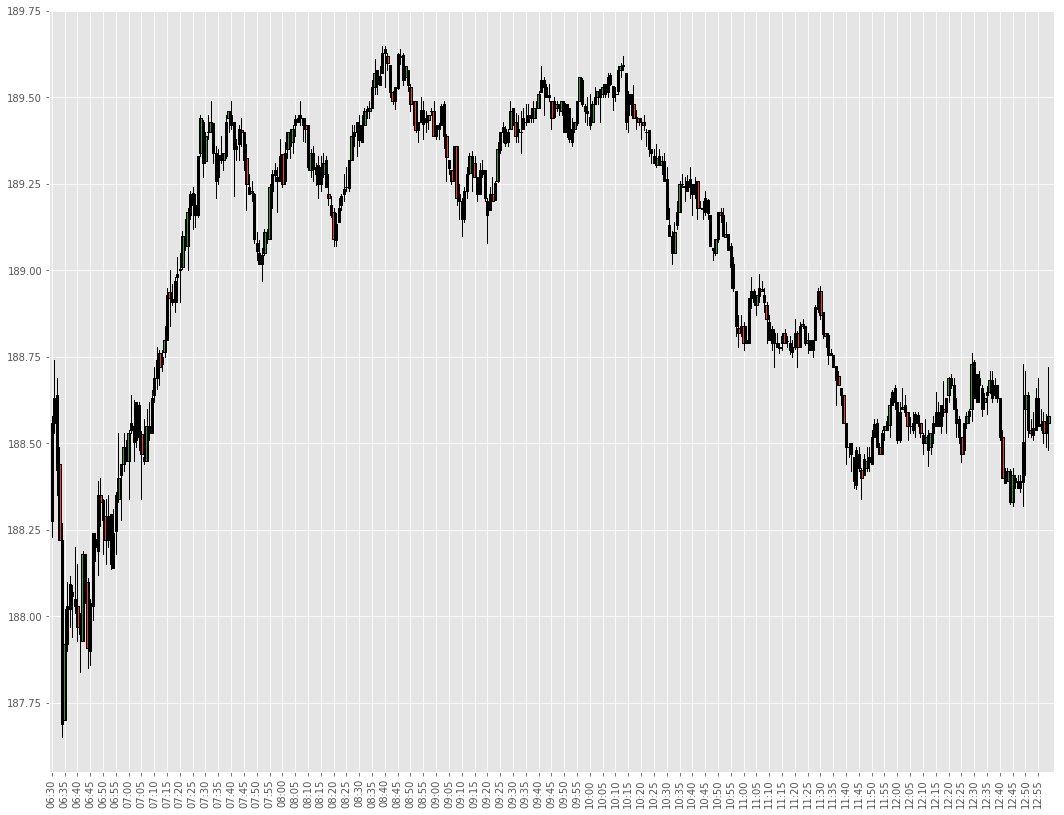

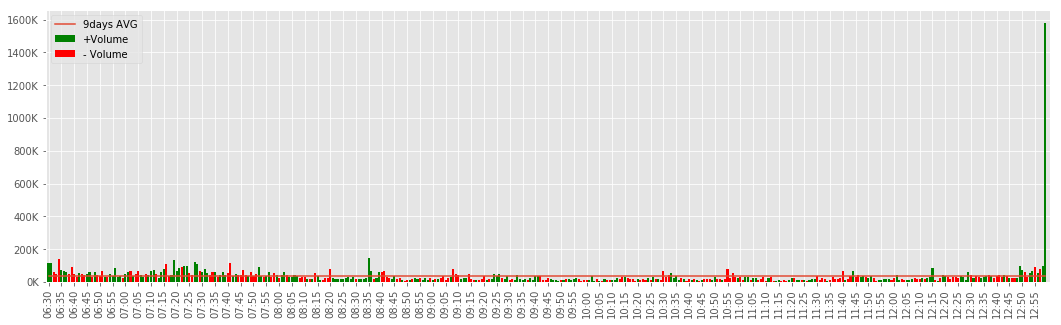

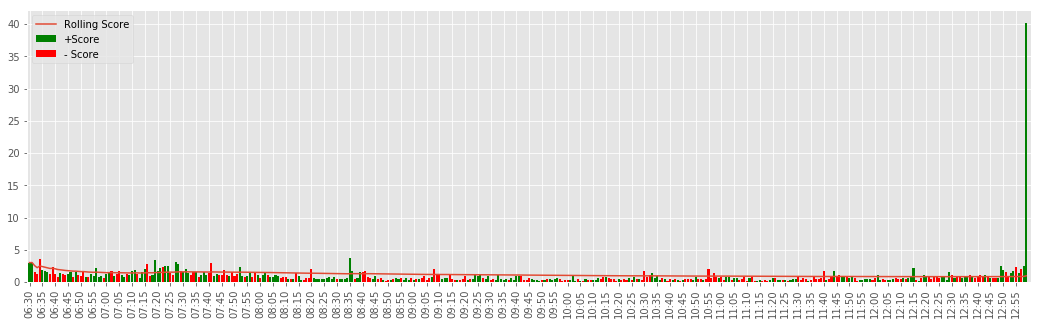

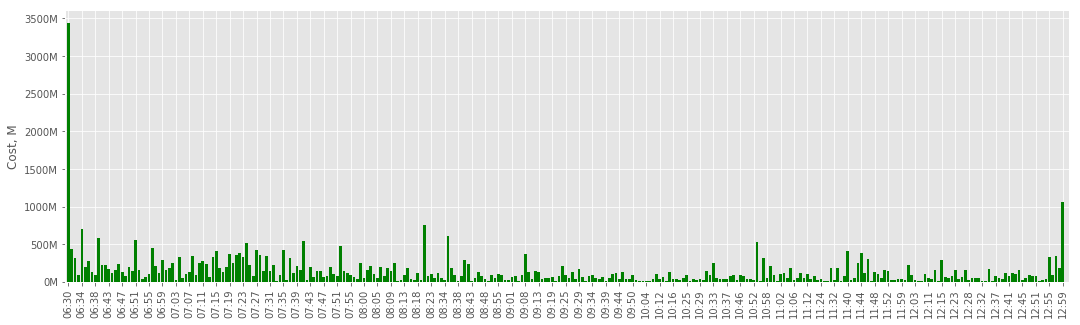

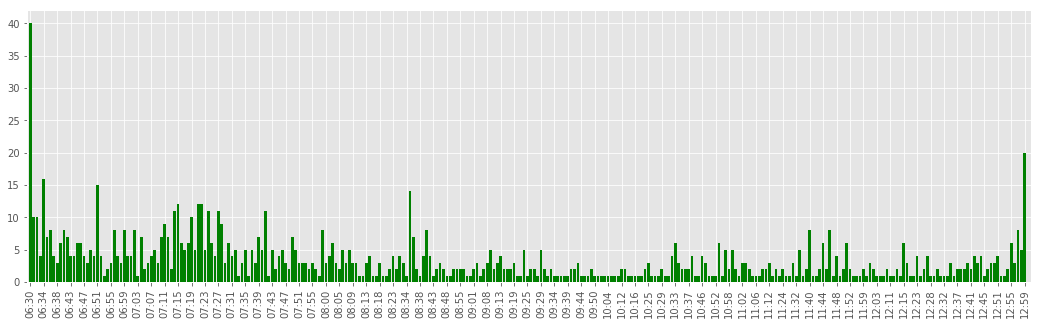

In [9]:
%matplotlib inline
from matplotlib.finance import candlestick2_ochl
from matplotlib import pyplot as plt, ticker, style
style.use('ggplot')

def display_charts(df, trade_df):
    len_df = len(df)
    if len_df:
        df = df.reset_index()    
        xticks = [n for n in range(0, len(df), 5)]

        # plot data
        fig = plt.figure(figsize=(18, 14)) 
        ax1 = plt.subplot(111)
        candlestick2_ochl(ax1, df.open, df.close, df.high, df.low, width=.9, colorup='g')
        ax1.set_xticks(xticks)
        ax1.set_xticklabels([df.iloc[i].time.strftime('%H:%M') for i in ax1.get_xticks()], rotation=90)
        ax1.set_xlim(-1, len(df)+1)

        # Volume
        fig = plt.figure(figsize=(18, 5)) 
        ax2 = plt.subplot(111)
        positive = df[df.close >= df.open]
        negative = df[df.close < df.open]

        ax2.bar(positive.index, positive.volume, color='green', align='center', label="+Volume") 
        ax2.bar(negative.index, negative.volume, color='red', align='center', label="- Volume")
        ax2.set_xticks(xticks)
        ax2.set_xticklabels([df.time[i].strftime('%H:%M') for i in ax2.get_xticks()], rotation=90)
        ax2.set_xlim(-1, len(df)+1)
        # average volume
        ax2.plot(df.index, df.avg9days, label="9days AVG")
        ax2.legend(fancybox=True, loc='best')
        ax2.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x,p: "%dK" % (x / 1000)))

        fig = plt.figure(figsize=(18, 5)) 
        ax3 = plt.subplot(111)
        ax3.bar(positive.index, positive.current_score, color='green', align='center', label="+Score")
        ax3.bar(negative.index, negative.current_score, color='red', align='center', label="- Score")    
        ax3.plot(df.index, df.rolling_score, label="Rolling Score")
        ax3.legend(fancybox=True, loc='best')
        ax3.set_xticks(xticks)
        ax3.set_xticklabels([df.time[i].strftime('%H:%M') for i in ax2.get_xticks()], rotation=90)
        ax3.set_xlim(-1, len(df)+1)
    
    # trades
    len_trade_df = len(trade_df)
    if len_trade_df:
        trade_df = trade_df.reset_index()
        neg_times = set(negative.time.values)
        positive = trade_df[trade_df.Time.isin(neg_times) == False]    
        negative = trade_df[trade_df.Time.isin(neg_times)]


        fig = plt.figure(figsize=(18, 5)) 
        ax4 = plt.subplot(111)  

        if len(positive):
            ax4.bar(positive.index, positive.Cost, color='green', align='center')
        if len(negative):
            ax4.bar(negative.index, negative.Cost, color='red', align='center')
        
        period = len_trade_df // 90 + 1
        xticks = [n for n in range(0, len_trade_df, period)]
        ax4.set_xticks(xticks)
        ax4.set_xticklabels([trade_df.iloc[i].Time.strftime('%H:%M') for i in ax4.get_xticks()], rotation=90)
        ax4.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x,p: "%dM" % (x / 1000000)))
        ax4.set_ylabel('Cost, M')
        ax4.set_xlim(-1, len_trade_df+1)


        fig = plt.figure(figsize=(18, 5)) 
        ax5 = plt.subplot(111)    
        if len(positive):
            ax5.bar(positive.index, positive.Count, color='green', align='center')
        if len(negative):
            ax5.bar(negative.index, negative.Count, color='red', align='center')
        ax5.set_xticks(xticks)
        ax5.set_xticklabels([trade_df.iloc[i].Time.strftime('%H:%M') for i in ax5.get_xticks()], rotation=90)
        ax5.set_xlim(-1, len_trade_df+1)
    
    
    plt.show()

display_charts(all_dd[all_dd.symbol == "AAPL"], trade_lots_df[trade_lots_df.Symbol == "AAPL"])

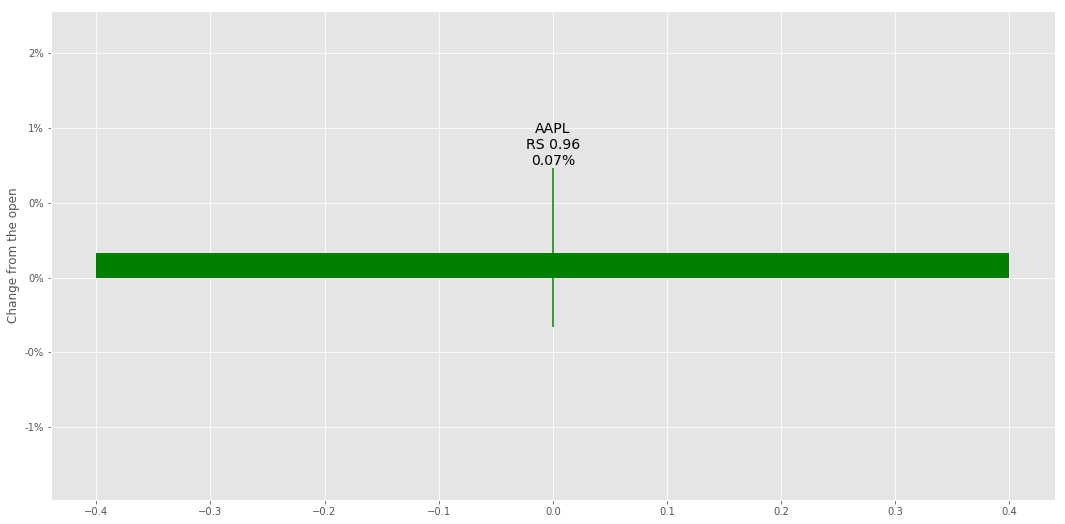

,symbol,close,open,change_current,change_high,change_low,opening_change,rolling_score
0,AAPL,188.58,188.56,0.161997,0.730315,-0.331961,0.066436,0.964821


In [10]:
def display_summary_chart(dd):
    dd = dd.reset_index()
    positive = dd[dd.change_current >= 0]
    negative = dd[dd.change_current < 0]
    
    fig = plt.figure(figsize=(18, 9)) 
    ax = plt.subplot(111)
    ax.bar(positive.index, positive.change_current, color='green', align='center', label="Pos")
    ax.bar(negative.index, negative.change_current, color='red', align='center', label="Neg")    
    lines = plt.vlines(positive.index, positive.change_low, positive.change_high, colors='g')
    paths1 = lines.get_paths()
    lines = plt.vlines(negative.index, negative.change_low, negative.change_high, colors='r')
    paths2 = lines.get_paths()
    
    def autolabel(rects, dd):        
        for n, rect in enumerate(rects):
            item = dd.iloc[n]            
            box = rect.get_extents()
            x = box.x0            
            y = box.y0 - 1.1 if item.change_current < 0 else box.y1
            ax.text(x, y, "{}\nRS {:.2f}\n{:.2f}%".format(item.symbol, item.rolling_score, item.opening_change), 
                    ha='center', va='bottom', fontsize=14)

    autolabel(paths1, positive)
    autolabel(paths2, negative)
    
    y_min, y_max = ax.get_ylim()
    ax.set_ylim(y_min - 1.1, y_max + 1) 
    ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x,p: "{:.0f}%".format(x)))
    ax.set_ylabel('Change from the open')
    plt.show()

last_minute_dd = all_dd.groupby('symbol').last().reset_index()
display_summary_chart(last_minute_dd)
last_minute_dd[
    ['symbol', 'close', 'open', 'change_current', 'change_high', 'change_low', 'opening_change', 'rolling_score']
]

In [11]:
def get_current_time_period(now):
    lots_times = (
        (6, 59),
        (7, 29),
        (7, 59),
        (8, 29),
        (8, 59),
        (9, 29),
        (9, 59),
        (10,29),
        (10, 59),
        (11, 29),
        (11, 59),
        (12, 29),
        (13, 0),
    )
    for n, i in enumerate(lots_times):
        if i > (now.hour, now.minute):
            break
    
    return n + 1
    

now = datetime.now(tz=LOCAL_TZ)
print(now)
get_current_time_period(now)

2018-05-28 06:56:33.764119-07:00


1

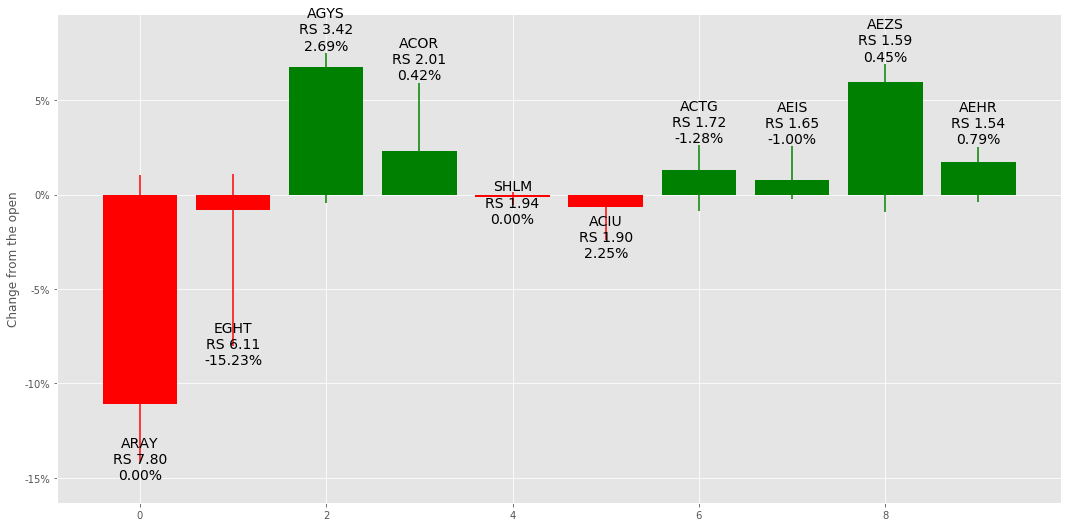

1. ARAY 12:59PM: Rolling Score 7.798501014797832, Current Score 62.11981644000804


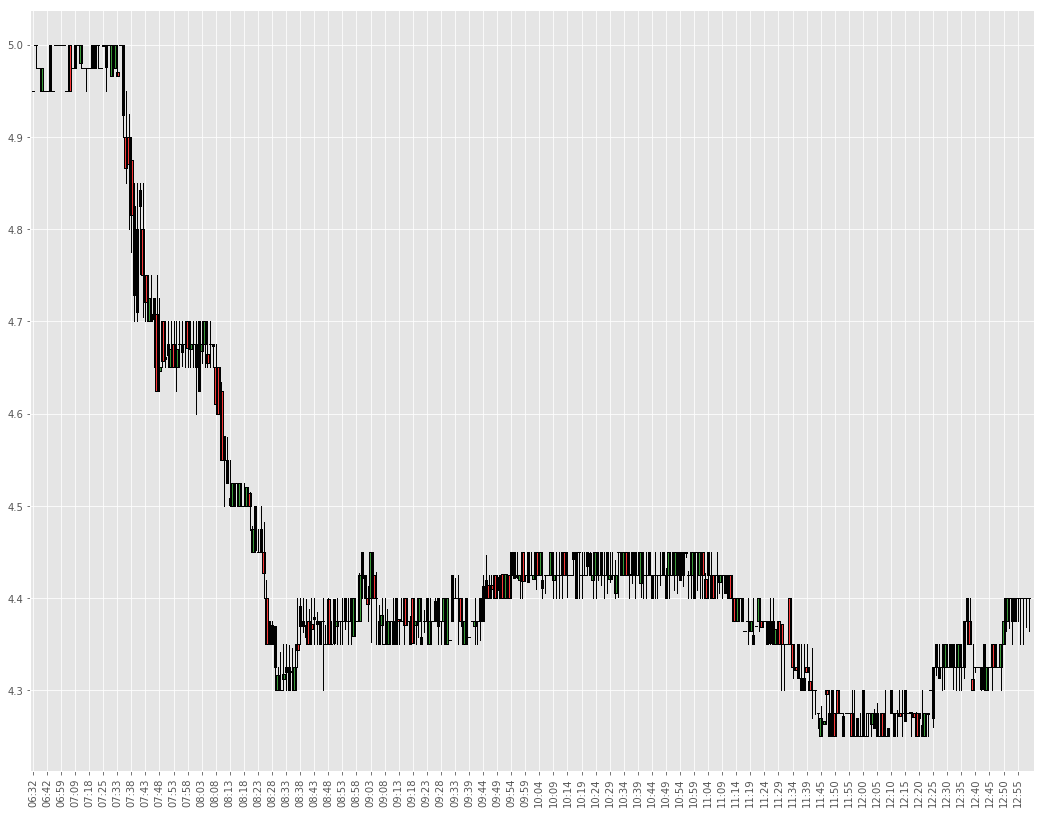

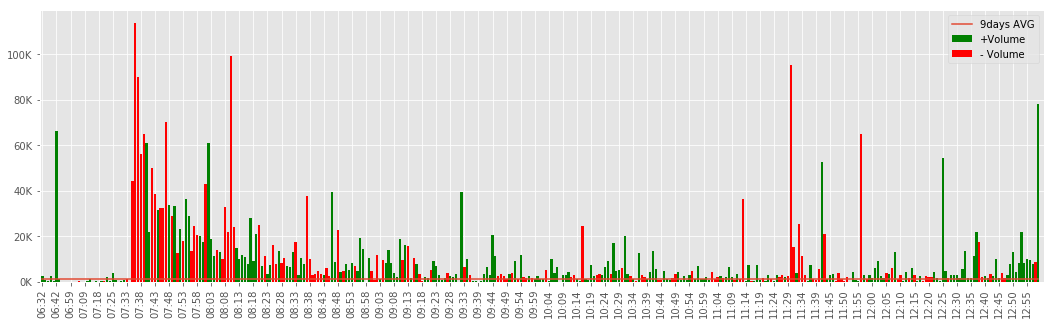

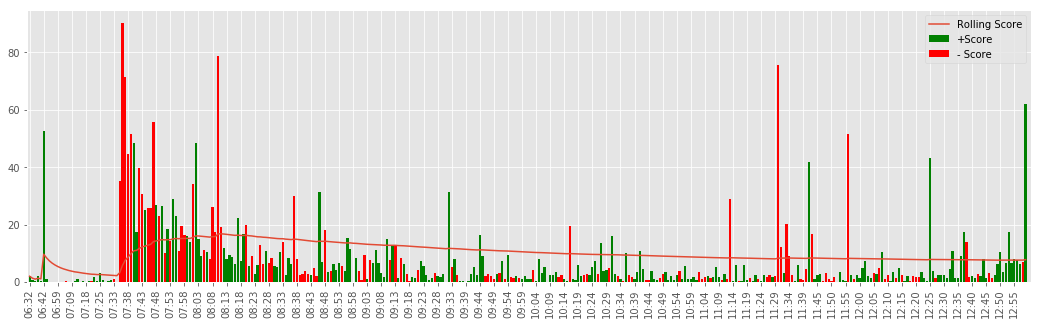

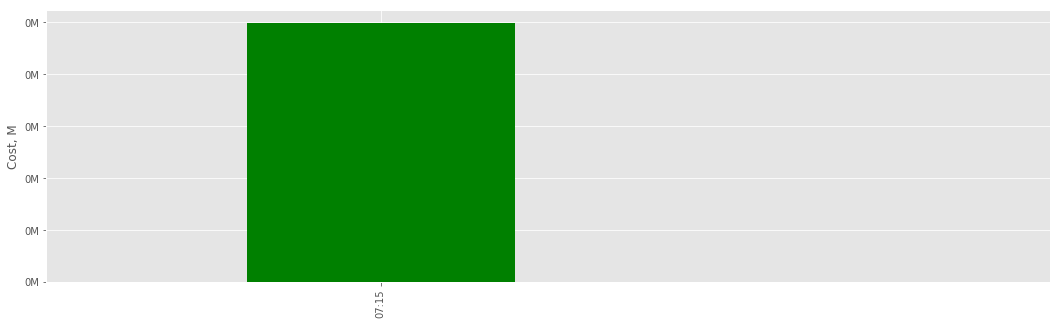

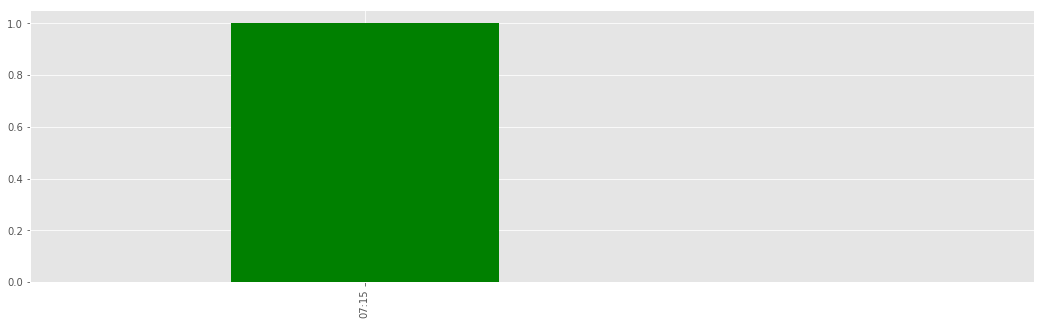

2. EGHT 12:59PM: Rolling Score 6.111551087178298, Current Score 38.22224603400992


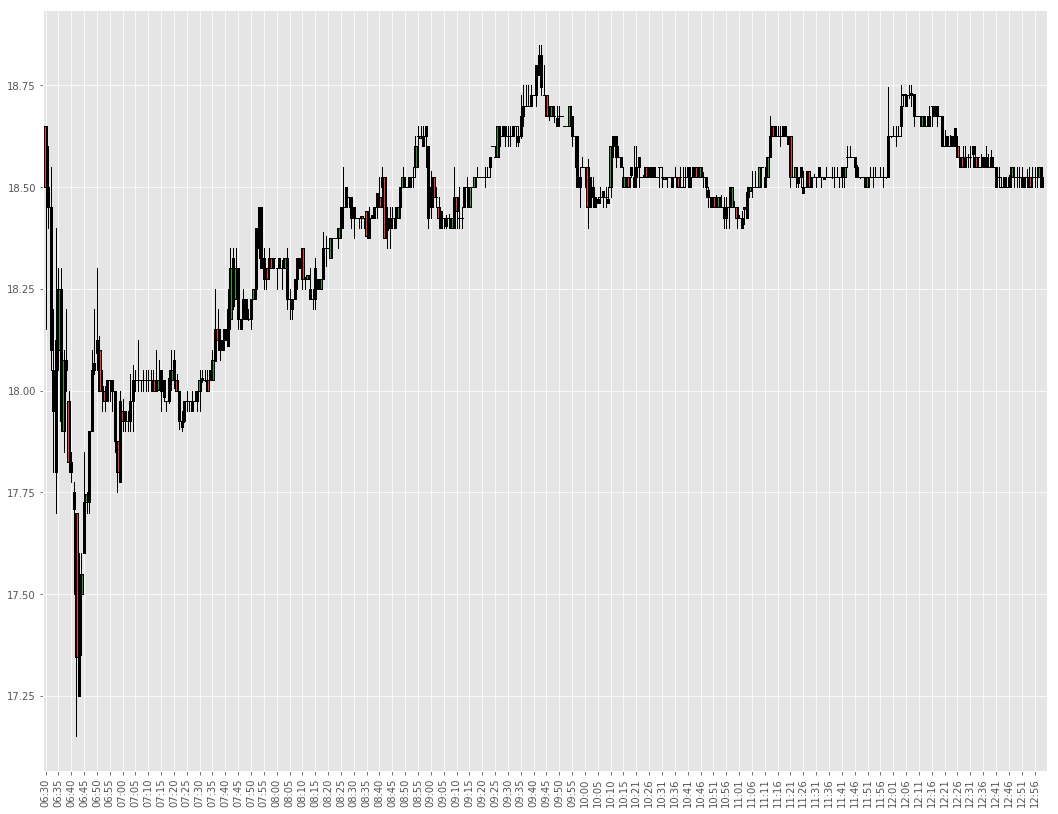

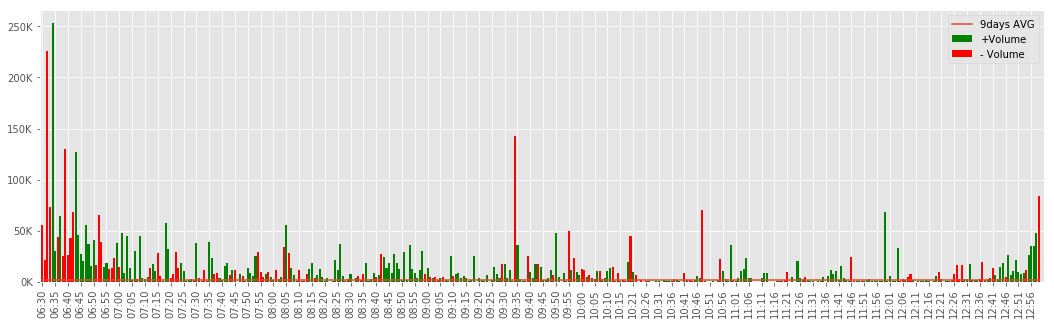

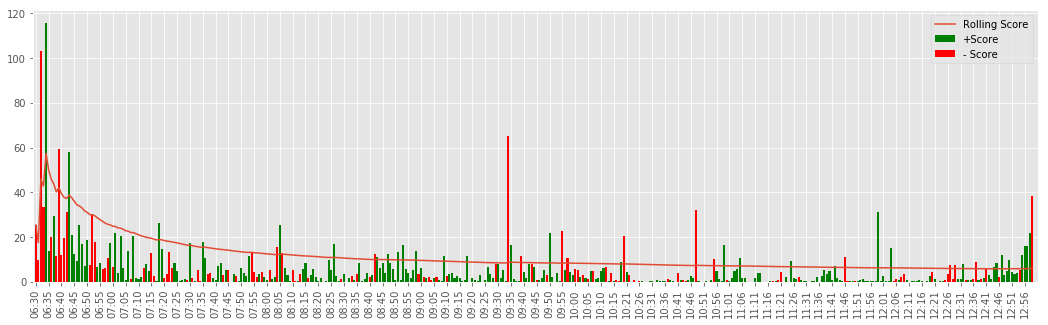

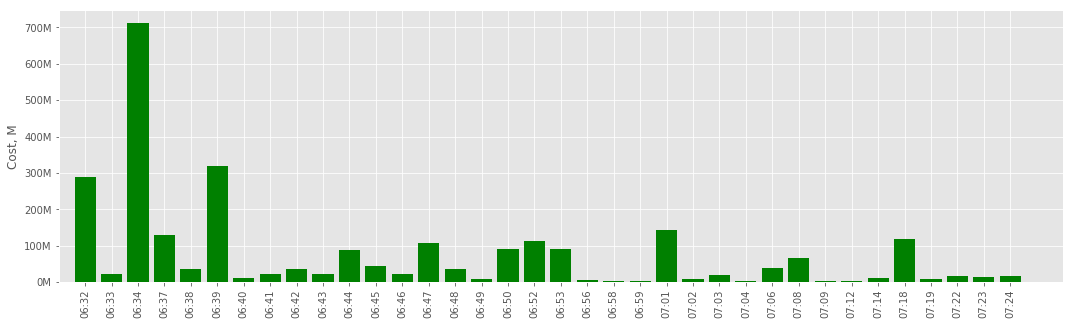

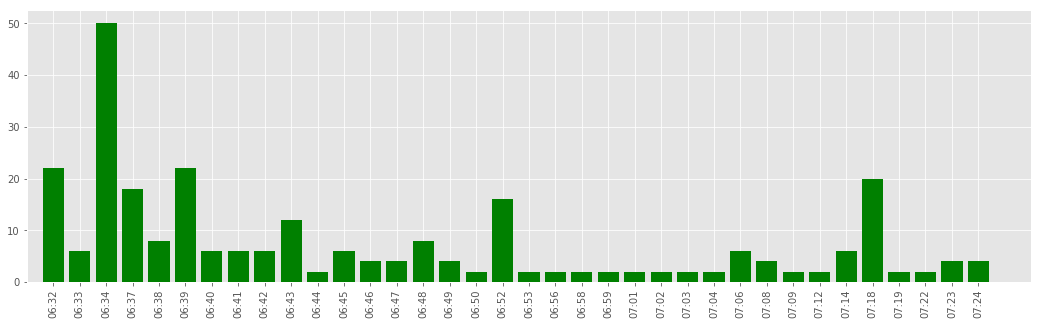

3. AGYS 12:59PM: Rolling Score 3.4205118793926252, Current Score 9.828955690120864


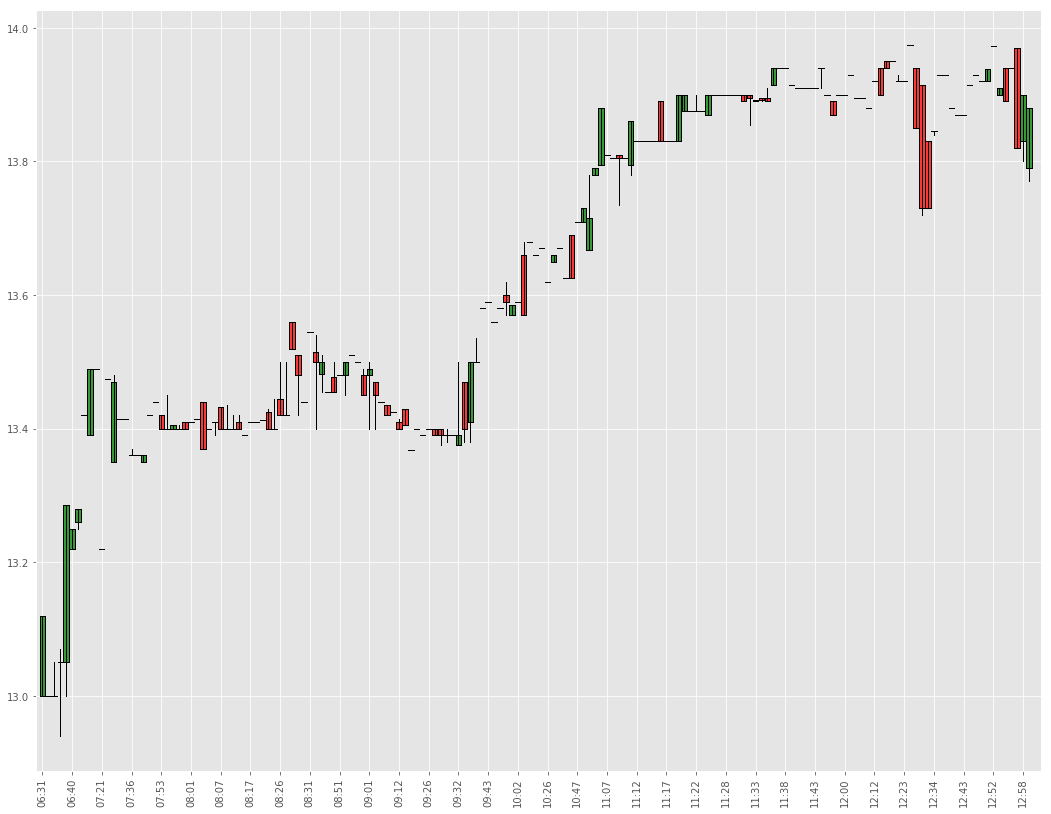

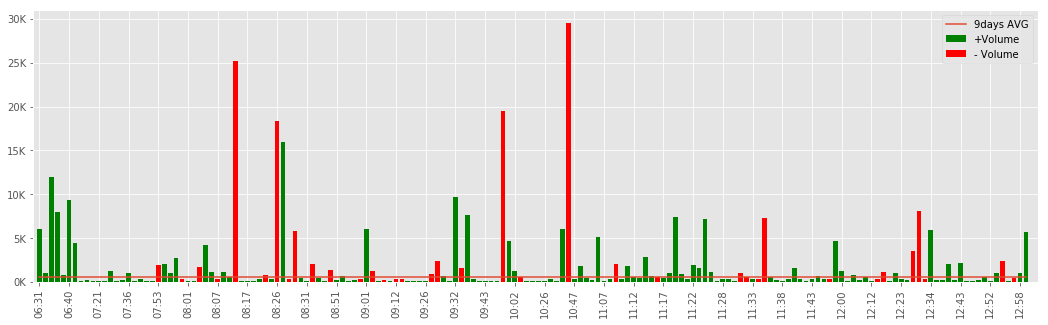

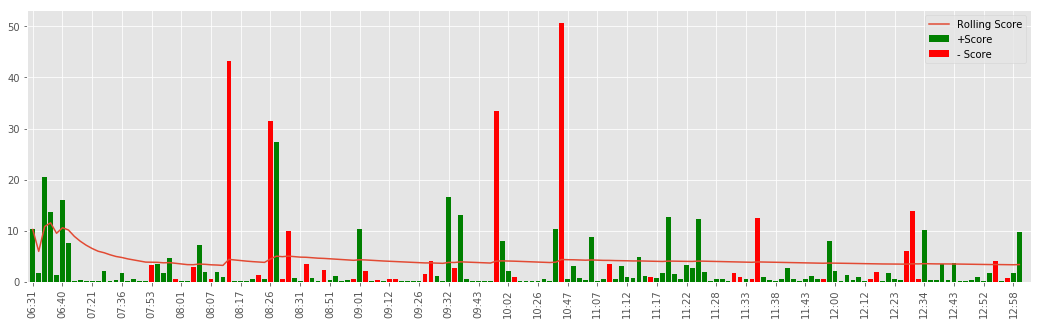

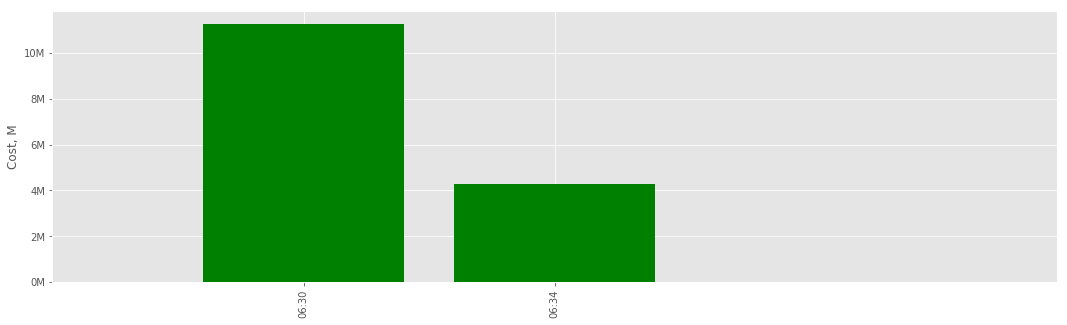

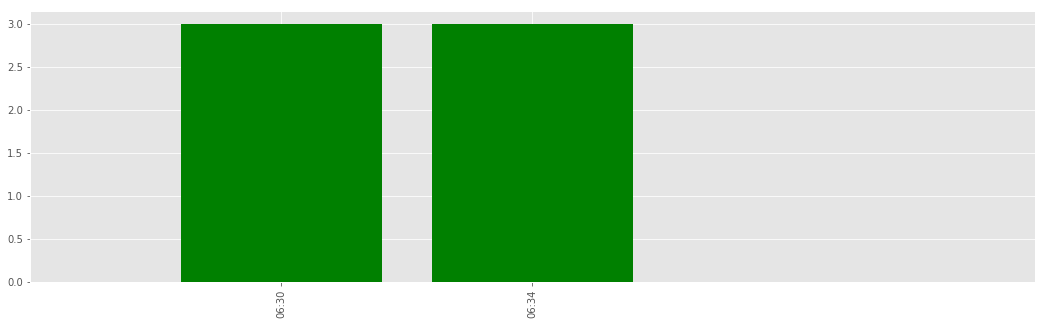

4. ACOR 12:59PM: Rolling Score 2.006064220331853, Current Score 45.661234110683445


KeyboardInterrupt: 

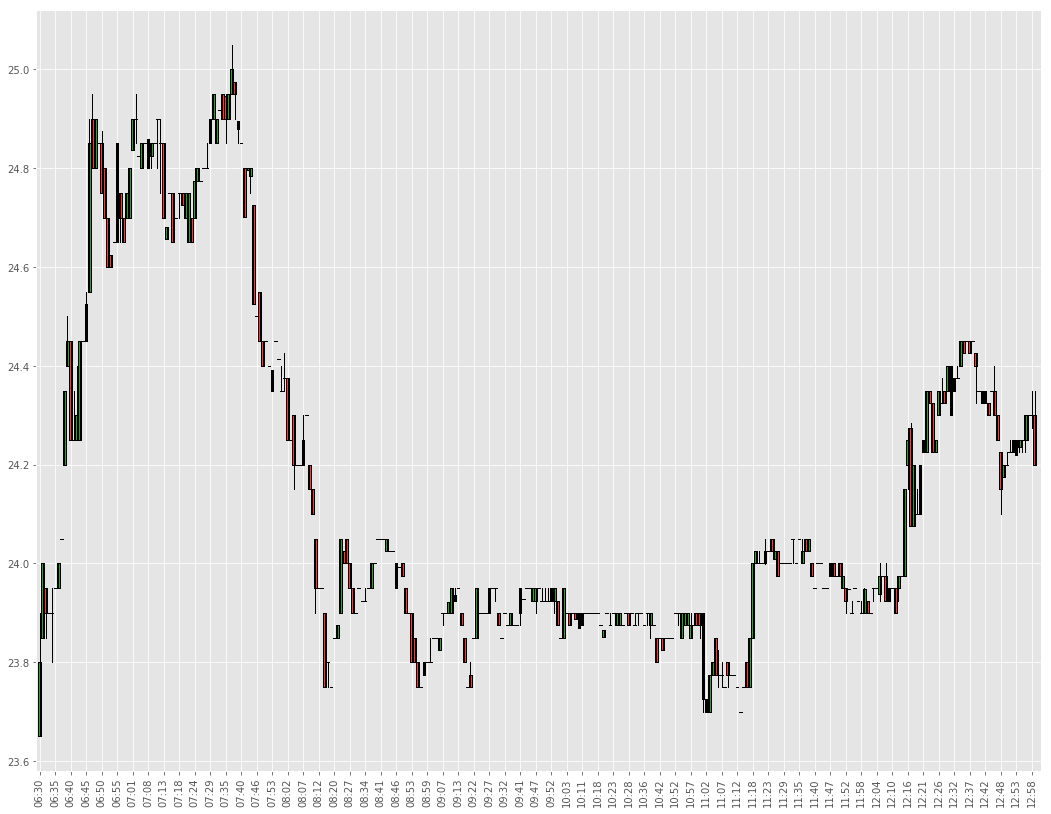

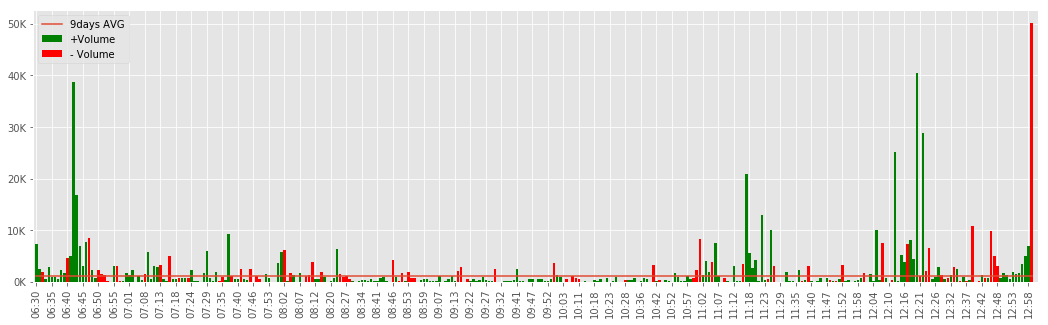

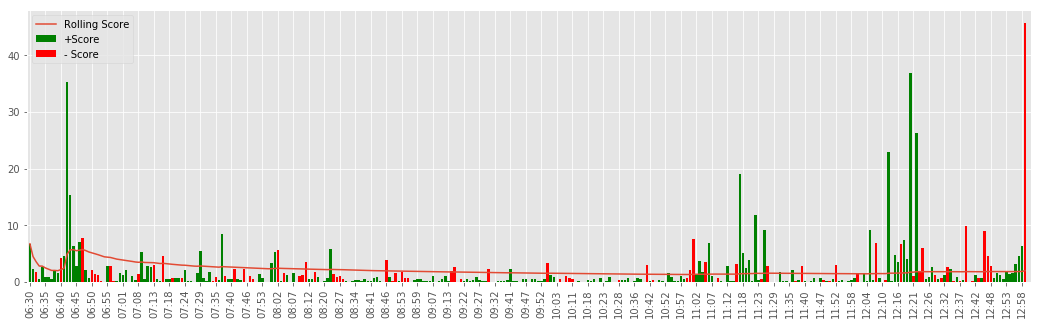

In [12]:
from datetime import datetime, timedelta
from IPython.display import clear_output, display, HTML
import numpy as np
import pytz
from time import sleep

TOP_LIMIT = 10
LOCAL_TZ = pytz.timezone('America/Los_Angeles')
stocks = get_stocks()

def display_list_items(top_df, all_df, trade_df):
    for n, item in enumerate(top_df.itertuples()):
        print(
            "{}. {} {}: Rolling Score {}, Current Score {}".format(
                n + 1, item.symbol, item.time.strftime("%I:%M%p"), 
                item.rolling_score, item.current_score
            )
        )
        display_charts(all_df[all_df.symbol == item.symbol], trade_df[trade_df.Symbol == item.symbol])

last_time = None
trade_lots = None
trade_cache_times = {}


while True:    
    now = datetime.now(tz=LOCAL_TZ)
    start = now.replace(hour=6, minute=30, second=0, microsecond=0)
    stop = start.replace(hour=13, minute=0)
    
    if start <= now <= stop: # proper time for getting data
        
        if last_time: # no more often than once per minute
            diff = 60 - (now - last_time).seconds 
            if diff > 0:
                sleep(diff)
                
        # MINUTE DATA            
        df = get_data_parallel(stocks)        
        if df is not None:
            last_minute_data = df.groupby('symbol').last().reset_index()
            top_volumes = last_minute_data.sort_values(by='rolling_score', ascending=False)[:TOP_LIMIT]            
            top_symbols = top_volumes.symbol.values
            
            # TRADE DATA
            # check saved periods
            
            current_time_period = get_current_time_period(now)
            symbol_saved_periods = {}
            for symbol in top_symbols:
                saved_time = int(trade_cache_times.get(symbol, 0))
                symbol_saved_periods[symbol] = tuple(range(saved_time + 1, current_time_period + 1))
                trade_cache_times[symbol] = current_time_period - 1
                
            response = load_trades_data(symbol_saved_periods, now)
            res_len = len(response)
            if res_len:            
                if trade_lots is not None:
                    trade_lots = trade_lots.append(response, ignore_index=True)
                else:
                    trade_lots = response
                    
            # DRAW CHARTS
            clear_output()
            display(HTML("<h3>Rolling Score List</h3>"))
            display_summary_chart(top_volumes)
            display_list_items(top_volumes, df, trade_lots)   
            
            # drop current period data 
            trade_lots = trade_lots[trade_lots.TimePeriod != current_time_period]
         
        print("last update", now)
        print("prev update", last_time) 
        print("update time", datetime.now(tz=LOCAL_TZ) - now)
        last_time = now        
    else:   
        trade_lots = None
        trade_cache_times = {}
        if now < start:
            diff = start - now
        else:
            start_tommorow = start + timedelta(days=1)
            diff = start_tommorow - now
            
        print("time to start:", diff)
        sleep(diff.seconds + diff.microseconds * 0.1 ** 6)